In [2]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [4]:
N = 100 # A population\
a = .5/N #birth rate constant
b = .5/N # death rate constant

In [5]:
# We simulate a markov chain on finite space 0,1,...,N
# Each state represents population size. The x vector will contain the population size at a time step

In [9]:
nsteps = 1000
x = np.zeros(nsteps) #A vector of length 1000 that contains population size at each time step
x[0] = 25 # x0 = 25 initial conditions

In [13]:
# Pbirth = ax[t]
# Pdeath = bx[t]

Text(0.5,1,'Markov Chain')

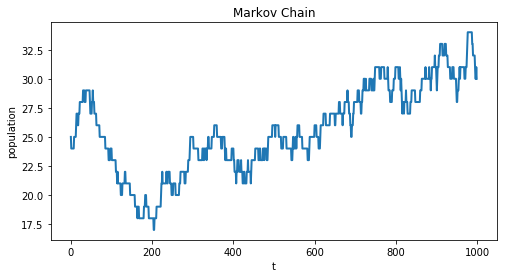

In [49]:
for t in range(nsteps-1):
    if 0 < x[t] < N-1:
        #The probability that a birth occurs is equal to ax[t]
        birth = np.random.rand() <= a*x[t]
        death = np.random.rand() <= b*x[t]
        
        x[t+1] = x[t] + 1*birth - 1*death
    else:
        x[t+1] = x[t]

fig, ax = plt.subplots(1,1, figsize=(8,4))
ax.plot(x, lw=2)
plt.xlabel('t')
plt.ylabel('population')
plt.title('Markov Chain')

In [42]:
# Simulate many trials of the above proccess. We will vectorize the trials to incrase the speed

In [103]:
def simulate(x, nsteps,ntrials):
    for _ in range(nsteps-1):
        # For the last operation in the range of nsteps -1
        # update the matrix only where the population is not 0 or Max
        upd = (0<x)&(x<N-1) # An update vector; dypte bool
        #births occur in the following trials
        birth = 1*(np.random.rand(ntrials) <=a*x)
        #deaths occur in the following trials
        death = 1*(np.random.rand(ntrials) <=b*x)
        #update the trials
        
        x[upd] = x[upd] + birth[upd]-death[upd] # evaluate RHS. Set x equal to itself + RHS

In [52]:
ntrials = 100
# returns a vector of random numbers from 0 to 100 of length equal to the number of trials
# This vector is x[t=0] for each trial
x = np.random.randint(size=ntrials, low=0, high=N)

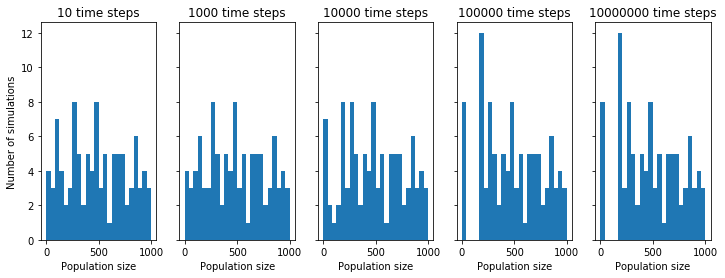

In [120]:
ntrials = 100
# returns a vector of random numbers from 0 to 100 of length equal to the number of trials
# This vector is x[t=0] for each trial
N = 1000
x = np.random.randint(size=ntrials, low=0, high=N)

bins = np.linspace(0,N,25)
nsteps_list = [10,1000,10000, 100000, 10000000]
fig, axes = plt.subplots(1, len(nsteps_list),
                        figsize=(12,4),
                        sharey=True)
for i, nsteps in enumerate(nsteps_list):
    ax = axes[i]
    simulate(x,nsteps,ntrials)
    ax.hist(x, bins=bins)
    ax.set_xlabel("Population size")
    if i == 0:
        ax.set_ylabel("Number of simulations")
    ax.set_title("%s time steps" %(nsteps))
    